# Percentage prediction - Linear Regression
#### Predict the percentage of the student based on no.of study hours using simple linear regression

## Author : Thejaswini Y R



# Importing python libraries

In [1]:
import pandas as pd 
import numpy as np  
import seaborn as sns
import matplotlib.pyplot as plt  
%matplotlib inline


# Loading dataset

In [2]:
url = "http://bit.ly/w-data"
Student_df = pd.read_csv(url)

# Exploratory data analysis

In [3]:
Student_df.head(6)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20


In [4]:
Student_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [5]:
Student_df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [6]:
Student_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
Student_df.shape

(25, 2)

# Data visualization

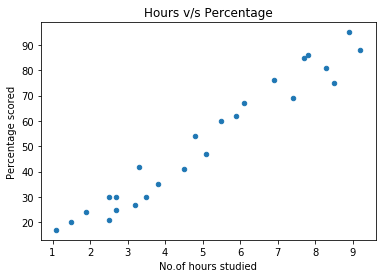

In [8]:
# Using scatterplot
Student_df.plot(kind='scatter', x = 'Hours', y= 'Scores')
plt.title('Hours v/s Percentage')
plt.xlabel('No.of hours studied')
plt.ylabel('Percentage scored')
plt.show()

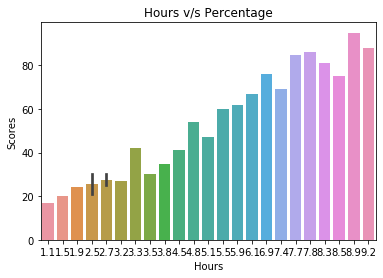

In [12]:
# Using barchart
plt.title('Hours v/s Percentage')
plt.xlabel('No.of hours studied')
plt.ylabel('Percentage scored')
sns.barplot(x='Hours', y='Scores', data=Student_df);

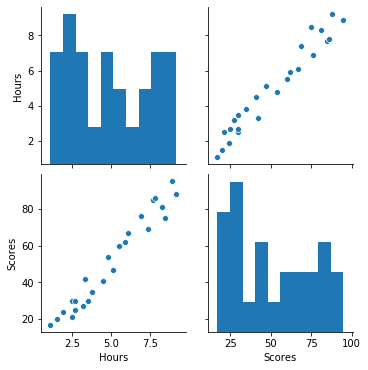

In [13]:
# Using pair plot
sns.pairplot(Student_df);

# data modeling

In [14]:
# Divide the data into attributes and labels
x = Student_df.iloc[:, :-1].values  
y = Student_df.iloc[:, 1].values  

In [12]:
# Split the data into test and traing test
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0) 
print(x_train)
print(y_train)

[[3.8]
 [1.9]
 [7.8]
 [6.9]
 [1.1]
 [5.1]
 [7.7]
 [3.3]
 [8.3]
 [9.2]
 [6.1]
 [3.5]
 [2.7]
 [5.5]
 [2.7]
 [8.5]
 [2.5]
 [4.8]
 [8.9]
 [4.5]]
[35 24 86 76 17 47 85 42 81 88 67 30 25 60 30 75 21 54 95 41]


In [13]:
# Fitting the model to data
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(x_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

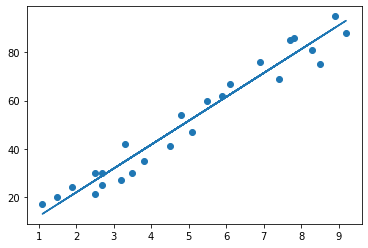

In [14]:
# Plotting the regressin line
Barline = regressor.coef_*x+regressor.intercept_
plt.scatter(x, y)
plt.plot(x, Barline);
plt.show()


In [15]:
# Predicting the scores
y_pred = regressor.predict(x_test)
data = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
data 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Evaluation of the model

In [16]:
from sklearn import metrics  
from sklearn.metrics import r2_score
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Accuracy : %.2f'%r2_score(y_test, y_pred) )


Mean Absolute Error: 4.183859899002975
Accuracy : 0.95


# Predict the score based on the hours he/she study

In [17]:
# Testing the model
hours = 9.25
Predicted_hours = regressor.predict([[hours]])
print("No of hours studied = {}".format(hours))
print("Percentage secured = {}".format(Predicted_hours[0]))

No of hours studied = 9.25
Percentage secured = 93.69173248737538


## Hence if you study 9.25 hrs you may get 93.69%